In [1]:
from math import sin, cos, ceil
import numpy
from matplotlib import pyplot
%matplotlib inline

In [2]:
g = 9.81
v_t = 4.9
CDCL = 1/5.
x0 = 0.
y0 = 0.

In [3]:
def f(u):
    v = u[0]
    theta = u[1]
    x = u[2]
    y = u[3]
    return numpy.array([-g*sin(theta) - CDCL*g/v_t**2*v**2, -g*cos(theta)/v + g/v_t**2*v, v*cos(theta), v*sin(theta)])

In [4]:
def euler_step(u, f, dt):
    return u + dt*f(u)

In [5]:
T = 100.
dt = 0.001
N = int(T/dt)+1
t = numpy.linspace(0., T, N)
u = numpy.empty((N,4))
u_values = numpy.empty(1, dtype=numpy.ndarray)

v0_values = numpy.empty(1)
v0_values[0]= 4.9

theta0_values = numpy.empty(1)
theta0_values[0]= -10.

x_array=numpy.empty((1, 3))
for i, v0 in enumerate(v0_values):
    for j, theta0 in enumerate(theta0_values):
        u[0] = numpy.array([v0, theta0, x0, y0])
        for n in range(N-1):
            u[n+1] = euler_step(u[n], f, dt)
            if u[n+1, 3] < 0:
                print u[n+1, 3], 'this'
                break
        u_values = u
        max_x = u[:,2].max()
        x_array=([v0, theta0, max_x])

-0.00100007046778 this


In [6]:
x = u[:,2]
y = u[:,3]

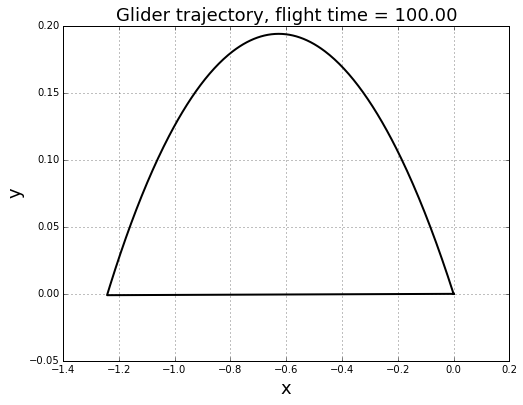

In [7]:
pyplot.figure(figsize=(8,6))
pyplot.grid(True)
pyplot.xlabel(r'x', fontsize=18)
pyplot.ylabel(r'y', fontsize=18)
pyplot.title('Glider trajectory, flight time = %.2f' % T, fontsize=18)
pyplot.plot(x,y, 'k-', lw=2);

In [8]:
print u

[[  4.90000000e+00  -1.00000000e+01   0.00000000e+00   0.00000000e+00]
 [  4.89270115e+00  -9.99631810e+00  -4.11145049e-03   2.66570344e-03]
 [  4.88543849e+00  -9.99263268e+00  -8.22654911e-03   5.31230277e-03]
 ..., 
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]]
